# NYU Deep Learning Spring 2021 - 01: Training MLP

In [1]:
import random
import torch
import math 
from torch import nn, optim
from IPython import display

In [2]:
import matplotlib.pyplot as plt
from res.plot_lib import set_default, plot_data, plot_model, acc

In [3]:
set_default()

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Create data - for CLASSIFICATION

In [5]:
seed = 12345
random.seed(seed)
torch.manual_seed(seed)
N = 1000 # num_samples_per_class
n = 2 # samples dimension (2d points)
K = 3 # num_classes
d = 100 # num_hidden_neurons

In [6]:
X = torch.zeros(N * K, n).to(device)
y = torch.zeros(N * K, dtype=torch.long).to(device)
for c in range(K):
    index = 0
    t = torch.linspace(0, 1, N)
    # when c = 0 and t = 0: start of linspace
    # when c = 0 and t = 1: end of linspace
    # this inner_var is for the formula inside sin() and cos()
    inner_var = torch.linspace(
        # when t = 0
        (2 * math.pi/K)*(c),
        # when t = 1
        (2 * math.pi/K)*(2+c),
        N
    ) +  torch.randn(N)*0.2
    
    for ix in range(N*c, N*(c+1)):
        X[ix] = t[index]*torch.FloatTensor((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1
print("shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))

shapes:
X: (3000, 2)
y: (3000,)


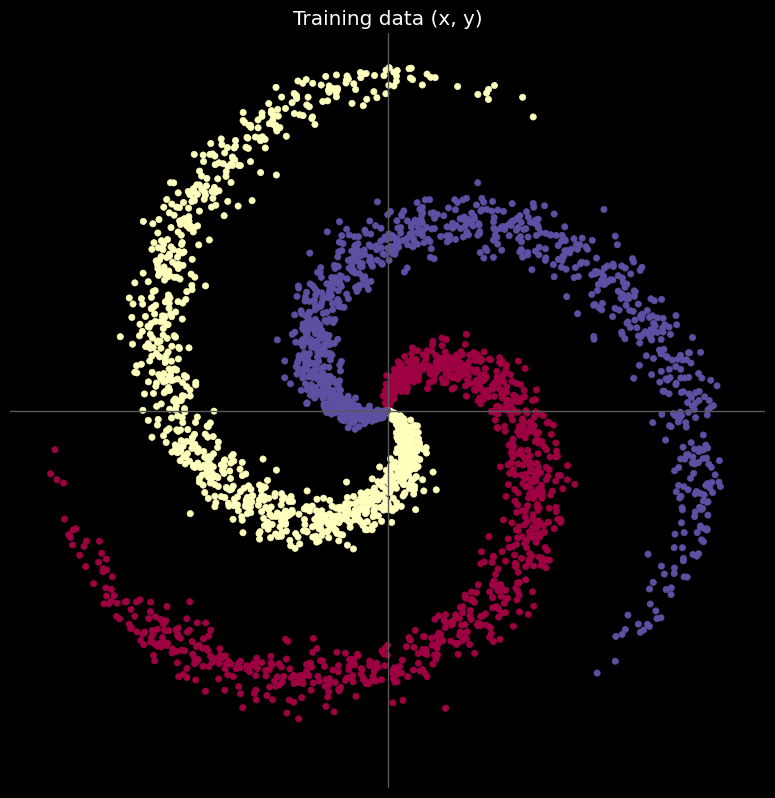

In [7]:
plot_data(X,y)

## Train a Linear model with pytorch

In [8]:
learning_rate = 1e-3
lambda_l2 = 1e-5

In [9]:
# nn package to create our linear model
# each Linear module has a weight and bias
model = nn.Sequential(
    nn.Linear(n, d),
    nn.Linear(d, K))

model.to(device) # to CUDA

# nn package also has different loss functions.
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# we use the optim package to apply
# stochastic gradient descent for our parameter update
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)

# Training
for t in range(1000):
    
    # Feed forward pass, output: Logits
    y_pred = model(X)
    
    # Compute the loss and accuracy
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float()/len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f"% (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    # zero the gradients before running the backward pass
    optimizer.zero_grad()
    
    # backward pass to compute gradient of loss w.r.t. trainable parameters
    loss.backward()
    
    # Update params
    optimizer.step()

[EPOCH]: 999, [LOSS]: 0.861541, [ACCURACY]: 0.504


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=3, bias=True)
)


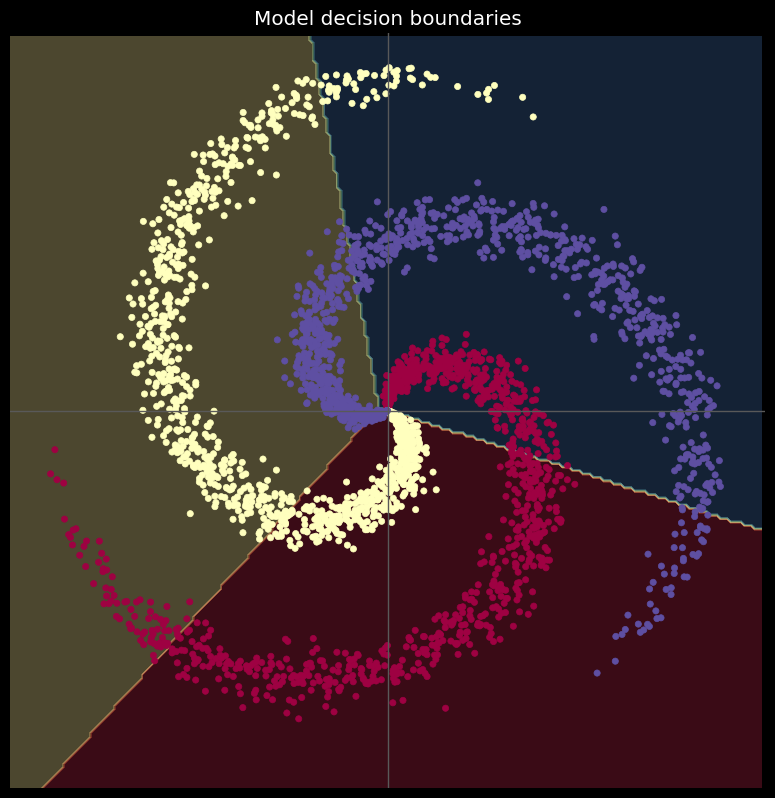

In [10]:
# plot trained model
print(model)
plot_model(X,y,model)

## Train a MLP with 2 layers and 100 neurons in pytorch

In [11]:
learning_rate = 1e-3
lambda_l2 = 1e-5

In [12]:
# nn package to create our linear model
# each Linear module has a weight and bias
model = nn.Sequential(
    nn.Linear(n, d),
    nn.ReLU(),
    nn.Linear(d, K))

model.to(device) # to CUDA

# nn package also has different loss functions.
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# we use the optim package to apply
# Adam for our parameter update
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)

# Training
for t in range(1000):
    
    # Feed forward pass, output: Logits
    y_pred = model(X)
    
    # Compute the loss and accuracy
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float()/len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f"% (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    # zero the gradients before running the backward pass
    optimizer.zero_grad()
    
    # backward pass to compute gradient of loss w.r.t. trainable parameters
    loss.backward()
    
    # Update params
    optimizer.step()

[EPOCH]: 999, [LOSS]: 0.178408, [ACCURACY]: 0.949


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=3, bias=True)
)


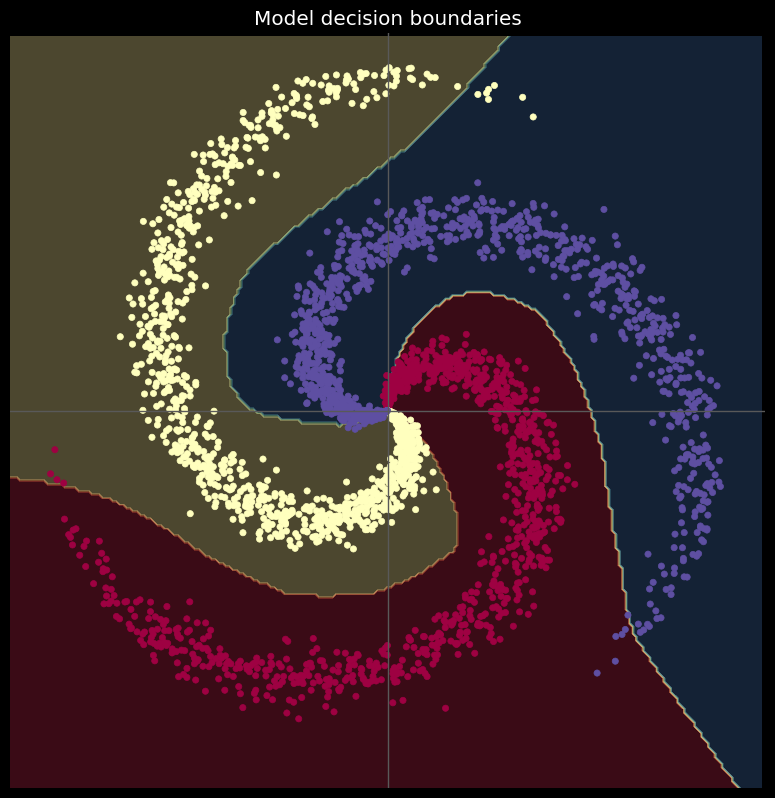

In [13]:
# plot trained model
print(model)
plot_model(X,y,model)

## Create data for REGRESSION

In [14]:
seed = 1
random.seed(seed)
torch.manual_seed(seed)
N = 1000 # num_samples_per_class
n = 1 # samples dimension (2d points)
K = 1 # num_classes
d = 100 # num_hidden_neurons

In [15]:
X = torch.unsqueeze(torch.linspace(-1,1,100), dim=1).to(device)
y = X.pow(3)+0.3*torch.rand(X.size()).to(device)

In [16]:
print("Shapes:")
print("X:", tuple(X.size()))
print("Y:", tuple(y.size()))

Shapes:
X: (100, 1)
Y: (100, 1)


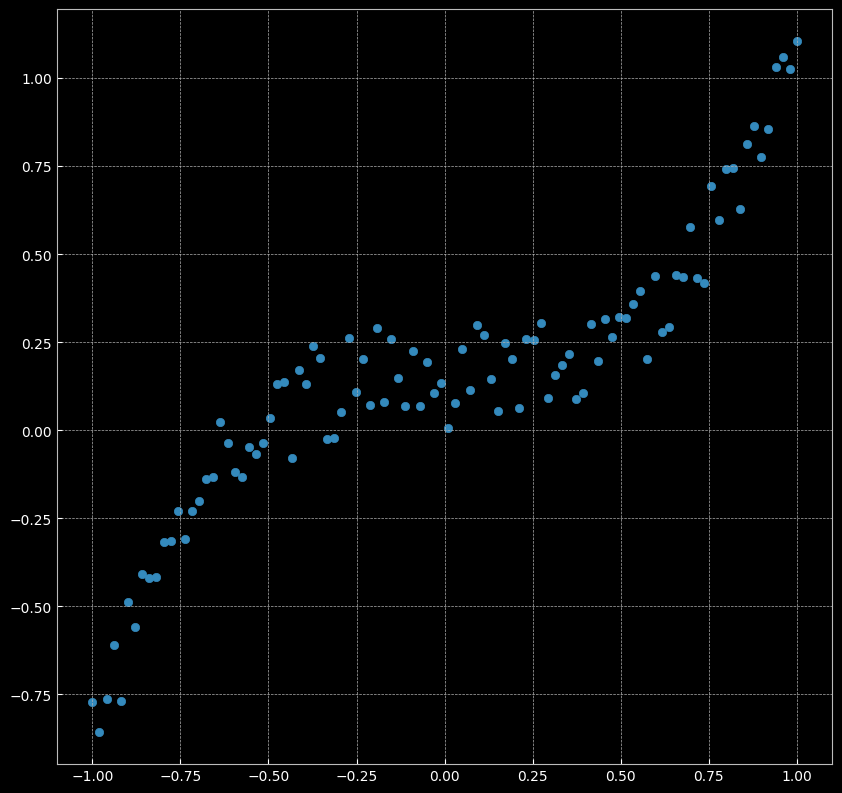

In [17]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy())
plt.axis('equal');

## Regression with linear model

In [18]:
# nn package to create our linear model
# each Linear module has a weight and bias
model = nn.Sequential(
    nn.Linear(n, d),
    nn.Linear(d, K))

model.to(device) # to CUDA

# nn package also has different loss functions.
# we use MSE loss for our regression task
criterion = torch.nn.MSELoss()

# we use the optim package to apply
# stochastic gradient descent for our parameter update
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)

# Training
for t in range(1000):
    
    # Feed forward pass, output: Logits
    y_pred = model(X)
    
    # Compute the loss and accuracy
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float()/len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f"% (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    # zero the gradients before running the backward pass
    optimizer.zero_grad()
    
    # backward pass to compute gradient of loss w.r.t. trainable parameters
    loss.backward()
    
    # Update params
    optimizer.step()

[EPOCH]: 999, [LOSS]: 0.029701, [ACCURACY]: 0.000


Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=1, bias=True)
)


(-1.1, 1.1, -0.9548871725797653, 1.2026630252599717)

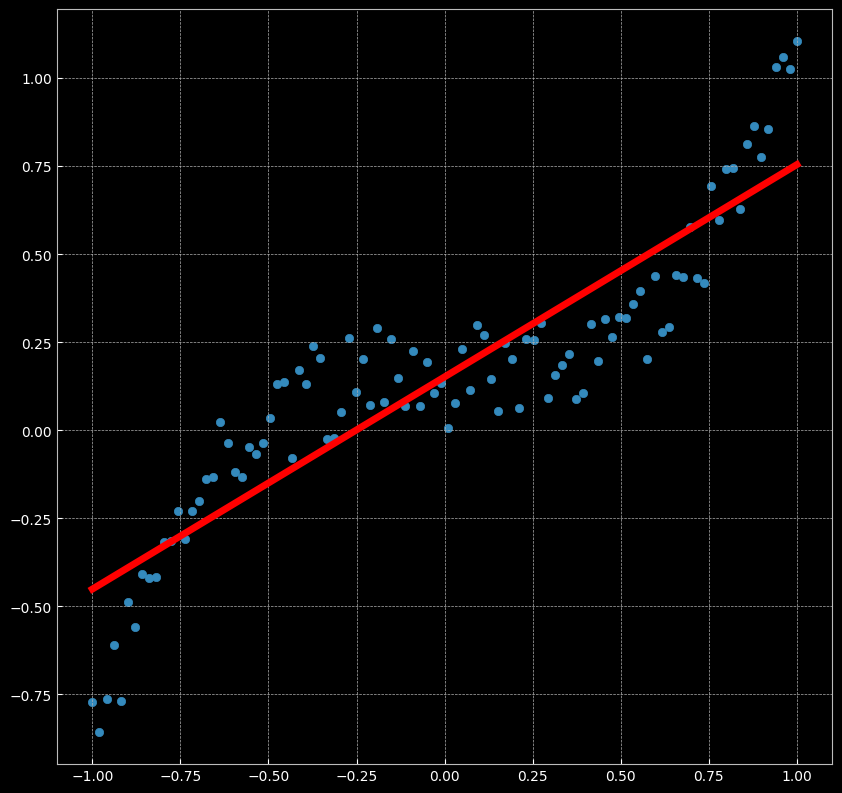

In [19]:
# plot trained model
print(model)
plt.scatter(X.data.cpu().numpy(), y.data.cpu().numpy())
plt.plot(X.data.cpu().numpy(), y_pred.data.cpu().numpy(), '-r', lw=5)
plt.axis('equal')

In [20]:
# Number of Networks
n_networks = 10
models = list()
y_pretrain = list()

# nn package also has different loss functions.
# we use MSE loss for our regression task
criterion = torch.nn.MSELoss()

for mod in range(n_networks):
    # nn package to create our linear model
    # each Linear module has a weight and bias
    model = nn.Sequential(
        nn.Linear(n, d),
        nn.ReLU() if mod < n_networks // 2 else nn.Tanh(),
        nn.Linear(d, K))

    model.to(device) # to CUDA
    
    # append model
    models.append(model)
    
    # we use the optim package to apply
    # stochastic gradient descent for our parameter update
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)
    
    # Training
    for t in range(1000):

        # Feed forward pass, output: Logits
        y_pred = model(X)
        
        # Append pre-train output
        if t == 0:
            y_pretrain.append(y_pred.detach())

        # Compute the loss and accuracy
        loss = criterion(y_pred, y)
        score, predicted = torch.max(y_pred, 1)
        acc = (y == predicted).sum().float()/len(y)
        print(f"[MODEL]: {mod+1}, [EPOCH]: {t}, [LOSS]: {loss.item():.6f}")
        display.clear_output(wait=True)

        # zero the gradients before running the backward pass
        optimizer.zero_grad()

        # backward pass to compute gradient of loss w.r.t. trainable parameters
        loss.backward()

        # Update params
        optimizer.step()

[MODEL]: 10, [EPOCH]: 999, [LOSS]: 0.007534


In [21]:
print(models[0], models[-1])

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
) Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Tanh()
  (2): Linear(in_features=100, out_features=1, bias=True)
)


## Prediction before training

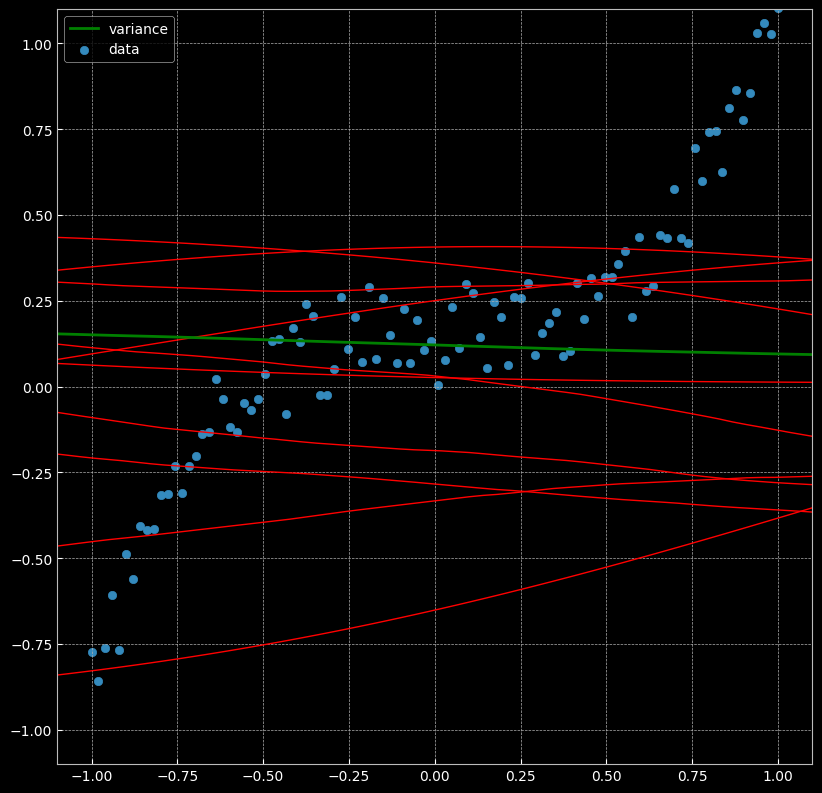

In [22]:
for y_pretrain_idx in y_pretrain:
    # new X that ranges from -2 to 2 instead of -1 to 1
    X_new = torch.unsqueeze(torch.linspace(-2,2,100), dim=1)
    
    plt.plot(X_new.numpy(), y_pretrain_idx.cpu().numpy(), 'r-', lw=1)
    
plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label="data")
plt.axis("square")
plt.axis((-1.1, 1.1, -1.1, 1.1));
y_combo = torch.stack(y_pretrain)
plt.plot(X_new.numpy(), y_combo.var(dim=0).cpu().numpy(), 'g', label='variance')
plt.legend()

## Prediction after training

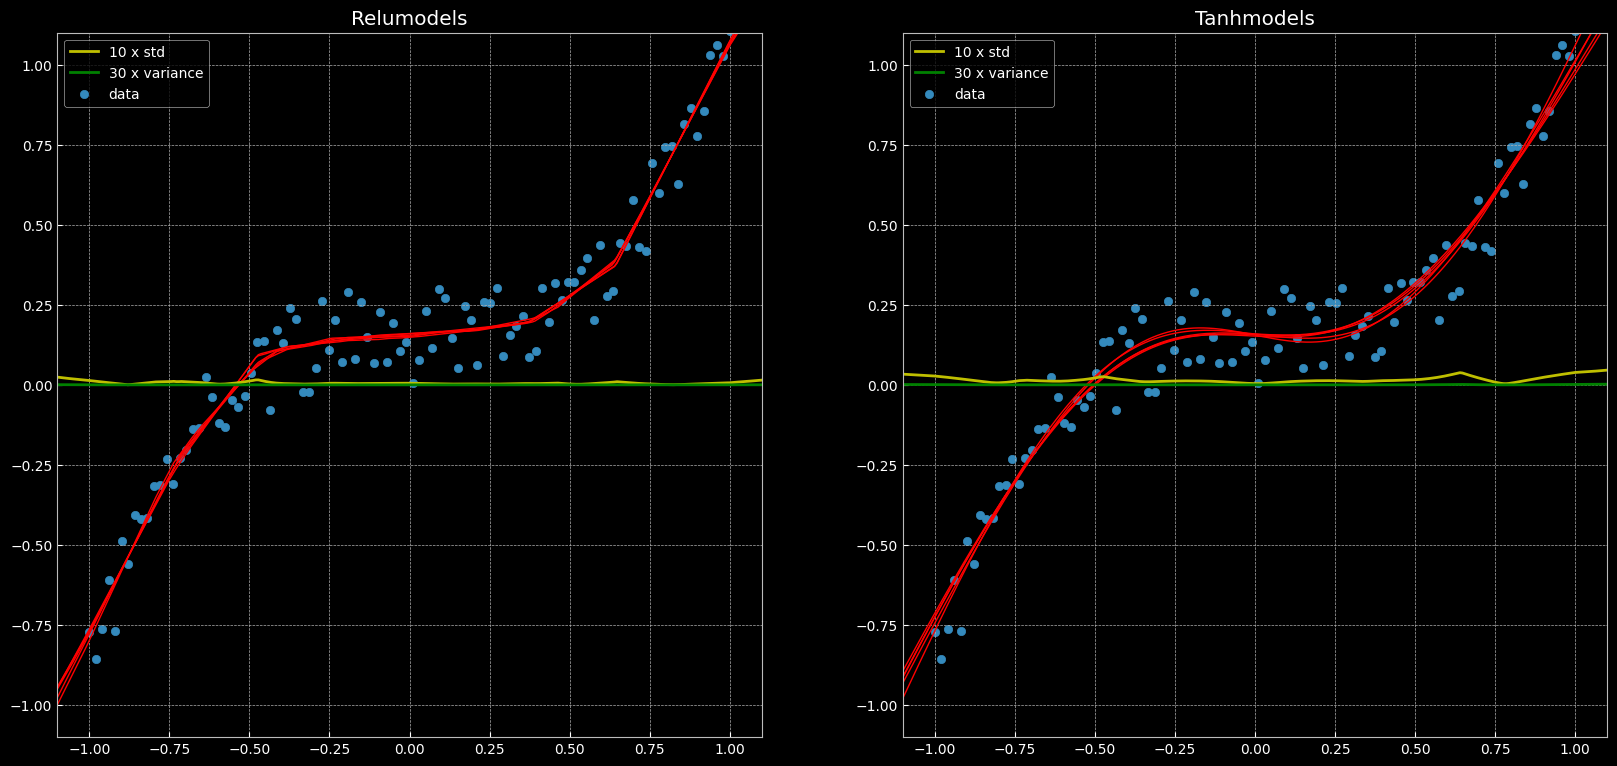

In [23]:
y_pred = list()
relu_models = models[:n_networks // 2]
tanh_models = models[n_networks // 2:]
plt.figure(figsize=(20,10))

def dense_prediction(models, non_linearity, zoom):
    plt.subplot(1, 2, 1 if non_linearity == 'Relu' else 2)
    for model in models:
        # new X that ranges from -4 to 4 instead of -1 to 1
        X_new = torch.unsqueeze(torch.linspace(-4,4,1001), dim=1)
        
        # getting predictions from input
        with torch.no_grad():
            y_pred.append(model(X_new))
            
        plt.plot(X_new.numpy(), y_pred[-1].cpu().numpy(), 'r-', lw=1)
    plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label="data")
    plt.axis("square")
    plt.axis((-1.1, 1.1, -1.1, 1.1)*zoom);
    y_combo = torch.stack(y_pred)
    plt.plot(X_new.numpy(), y_combo.var(dim=0).cpu().sqrt().numpy(), 'y', label='10 x std')
    plt.plot(X_new.numpy(), y_combo.var(dim=0).cpu().numpy(), 'g', label='30 x variance')
    plt.legend()
    plt.title(non_linearity + 'models')
    
z = 1 # try 1 or 4 
dense_prediction(relu_models, 'Relu', zoom=z)
dense_prediction(tanh_models, 'Tanh', zoom=z)